# Week 01 NVDA Stock Analysis for 5 Years

Stock: NVDA
- Basic information
- Historical data for the last 5 years with a precision of 1 day
- Annual and quarterly detailed financial reports for the last 5 years
- Balance sheets for the last 5 years
- Annual and quarterly cash flows for the last 5 years

In [6]:
from data_processing import dd
print(dd.foo())

foo


In [8]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.fundamentaldata import FundamentalData
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import os
from dotenv import load_dotenv

load_dotenv()

True

Basic test from [alpha_vantage github homepage](https://github.com/RomelTorres/alpha_vantage?tab=readme-ov-file) 

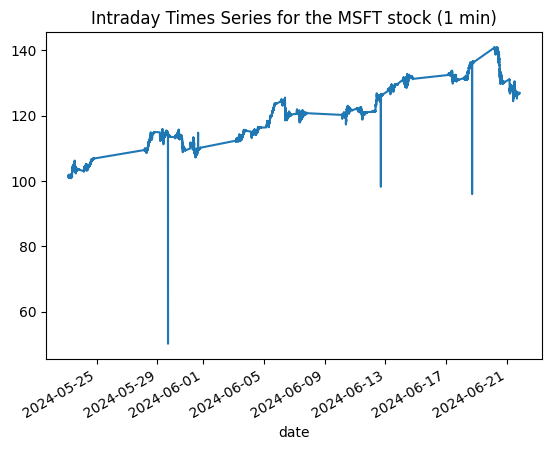

In [10]:
ts = TimeSeries(key='QZLC05N9YQGC4YYD', output_format='pandas')
daily_adjusted_data, meta_data = ts.get_intraday(
    symbol='NVDA', interval='1min', outputsize='full')
daily_adjusted_data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

Setup for APIs and other settings.

In [4]:
# API Keys
free_api_key = "QZLC05N9YQGC4YYD"
premium_api_key = os.getenv("ALPHA_VANTAGE_KEY")

symbol = 'NVDA'
fd = FundamentalData(premium_api_key)
ts = TimeSeries(key=premium_api_key, output_format='pandas')

row_data_path = '../../data/row/'

## Basic Information

In [1]:
# Fetch company overview data
overview_data, _ = fd.get_company_overview(symbol)
overview_df = pd.DataFrame.from_dict(overview_data, orient='index')

NameError: name 'fd' is not defined

In [23]:
# Save selected data to CSV
overview_data_path = os.path.join(
    row_data_path, f'{symbol}_financial_overview.csv')
overview_df.to_csv(overview_data_path, header=False)

## Historical data for the last 5 years with a precision of 1 day

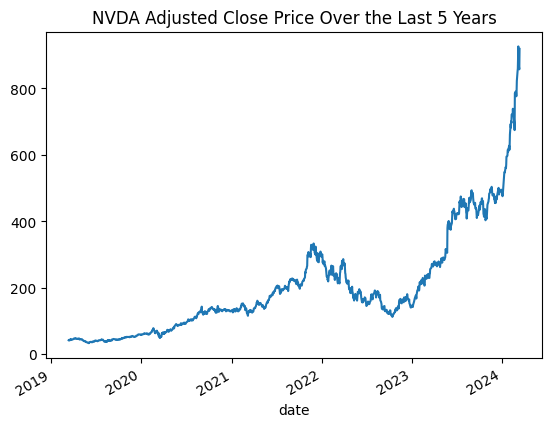

In [27]:
# Get historical stock data for NVDA
daily_adjusted_data, meta_data = ts.get_daily_adjusted(symbol=symbol, outputsize='full')

# Filter the last 5 years
now = pd.Timestamp.now()
start_date = now - pd.DateOffset(years=5)
data_last_5_years = daily_adjusted_data.loc[:start_date]

# Plot the closing price
data_last_5_years['5. adjusted close'].plot(
    title='NVDA Adjusted Close Price Over the Last 5 Years')
plt.show()

In [29]:
# Ensure the row_data_path directory exists
os.makedirs(row_data_path, exist_ok=True)

# Save the filtered data to a CSV file
today_str = datetime.datetime.now().strftime("%Y%m%d")
csv_file_path = os.path.join(
    row_data_path, f'{symbol}_5_years_daily_data_until_{today_str}.csv')
data_last_5_years.to_csv(csv_file_path)

print(f"Data saved to {csv_file_path}")

Data saved to ../../data/row/NVDA_5_years_daily_data.csv


## Annual and quarterly detailed financial reports for the last 5 years

In [9]:
def fetch_and_save_financial_reports(report_type, time_period, past_years=5):
    """
    Fetch and save financial reports to CSV.
    
    :param report_type: Type of financial report ('income_statement', 'balance_sheet', 'cash_flow')
    :param time_period: 'annual' or 'quarterly'
    """
    # Define a mapping of report types to their corresponding function calls
    report_function_mapping = {
        'income_statement': {
            'annual': fd.get_income_statement_annual,
            'quarterly': fd.get_income_statement_quarterly
        },
        'balance_sheet': {
            'annual': fd.get_balance_sheet_annual,
            'quarterly': fd.get_balance_sheet_quarterly
        },
        'cash_flow': {
            'annual': fd.get_cash_flow_annual,
            'quarterly': fd.get_cash_flow_quarterly
        }
    }

    # Fetch the data using the mapping
    data_function = report_function_mapping.get(report_type, {}).get(time_period)
    if data_function:
        data, _ = data_function(symbol)
    else:
        raise ValueError(
            f"Invalid report type '{report_type}' or time period '{time_period}'")

    # Add more conditions if fetching balance sheets or cash flow statements

    # Convert data to DataFrame
    if time_period == 'annual':
        df = pd.DataFrame(data.iloc[:past_years])
    elif time_period == 'quarterly':
        df = pd.DataFrame(data.iloc[:past_years * 4])

    # Ensure the row_data_path directory exists
    os.makedirs(row_data_path, exist_ok=True)

    # Save the DataFrame to a CSV file
    csv_file_path = os.path.join(
        row_data_path, f'{symbol}_{report_type}_{time_period}_5_years.csv')
    df.to_csv(csv_file_path, index=False)
    print(f"Saved {report_type} {time_period} reports to {csv_file_path}")

In [10]:
financial_reports = ['income_statement', 'balance_sheet', 'cash_flow']

# for report in financial_reports:
#     fetch_and_save_financial_reports(report, 'annual')

#     fetch_and_save_financial_reports(report, 'quarterly')

In [11]:
fetch_and_save_financial_reports('income_statement', 'annual')

fetch_and_save_financial_reports('income_statement', 'quarterly')

Saved income_statement annual reports to ../../data/row/NVDA_income_statement_annual_5_years.csv
Saved income_statement quarterly reports to ../../data/row/NVDA_income_statement_quarterly_5_years.csv


## Balance sheets for the last 5 years

In [12]:
fetch_and_save_financial_reports('balance_sheet', 'annual')
fetch_and_save_financial_reports('balance_sheet', 'quarterly')

Saved balance_sheet annual reports to ../../data/row/NVDA_balance_sheet_annual_5_years.csv
Saved balance_sheet quarterly reports to ../../data/row/NVDA_balance_sheet_quarterly_5_years.csv


## Annual and quarterly cash flows for the last 5 years

In [13]:
fetch_and_save_financial_reports('cash_flow', 'annual')

fetch_and_save_financial_reports('cash_flow', 'quarterly')

Saved cash_flow annual reports to ../../data/row/NVDA_cash_flow_annual_5_years.csv
Saved cash_flow quarterly reports to ../../data/row/NVDA_cash_flow_quarterly_5_years.csv
